In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from universe import *
# import seaborn as sns
from utils import *
from fisher import *
from profiles import*
from halo import HaloModel
from kernels import LensCMB
from limber import Limber

%load_ext line_profiler


## Setting up cosmology, mass function and pressure profile

In [2]:
cosmo = Cosmo()
mf = MassFunction(cosmo)
ep = ClusterElectronicPressure(cosmo)

/Users/fbianchini/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


## Calculate Battaglia+12 pressure profile

In [64]:
xarr = np.logspace(np.log10(0.03),np.log10(3))


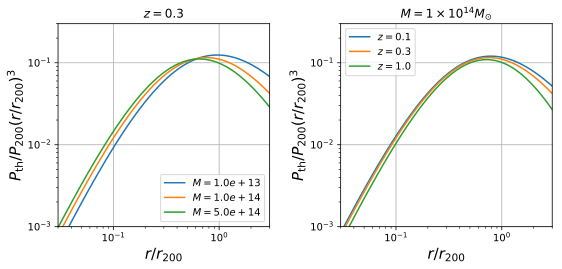

In [80]:
plt.figure(figsize=(8,4),)
plt.subplot(121)
for M in [1e13, 1e14, 5e14]:
    plt.loglog(xarr, pressure_fit_Battaglia12(xarr, M, 0.3)*xarr**3, label=r'$M=%.1e$'%M)
#     plt.loglog(xarr, pressure_fit_Battaglia12(xarr/c_Duffy(M,0.3,cosmo.h), M, 0.3)*(xarr/c_Duffy(M,0.3,cosmo.h))**3, '--', label=r'$M=%.1e$'%M)
plt.legend()
plt.xlabel(r'$r/r_{200}$', size=15)
plt.ylabel(r'$P_{\rm th}/P_{200}(r/r_{200})^3$', size=15)
plt.title(r'$z=0.3$')
plt.grid()
plt.ylim(1e-3,3e-1)
plt.xlim(0.03,3)

plt.subplot(122)
for z in [0.1,0.3,1.]:
    plt.loglog(xarr, pressure_fit_Battaglia12(xarr, 1e14, z)*xarr**3, label=r'$z=%.1f$'%z)
#     plt.loglog(xarr/c_Duffy(1e14,z,cosmo.h), pressure_fit_Battaglia12(xarr, 1e14, z)*xarr**3, '--',label=r'$z=%.1f$'%z)
plt.legend()
plt.xlabel(r'$r/r_{200}$', size=15)
plt.ylabel(r'$P_{\rm th}/P_{200}(r/r_{200})^3$', size=15)
plt.title(r'$M=1\times 10^{14}M_{\odot}$')
plt.grid()
plt.ylim(1e-3,3e-1)
plt.xlim(0.03,3)
plt.tight_layout()

## Calculate the pressure profile Fourier transform $y_{\ell}(M,z)$

In [48]:
ls = np.logspace(0,4,100)
yls = [ep.y_ell(l, 1e14, 0.3) for l in ls]

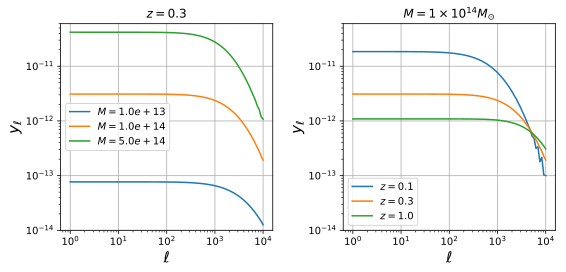

In [63]:
plt.figure(figsize=(8,4),)
plt.subplot(121)
for M in [1e13, 1e14, 5e14]:
    plt.loglog(ls, [ep.y_ell(l, M, 0.3) for l in ls], label=r'$M=%.1e$'%M)
plt.legend()
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$y_{\ell}$', size=15)
plt.title(r'$z=0.3$')
plt.grid()
plt.ylim(1e-14,6e-11)

plt.subplot(122)
for z in [0.1,0.3,1.]:
    plt.loglog(ls, [ep.y_ell(l, 1e14, z) for l in ls], label=r'$z=%.1f$'%z)
plt.legend()
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$y_{\ell}$', size=15)
plt.title(r'$M=1\times 10^{14}M_{\odot}$')
plt.grid()
plt.ylim(1e-14,6e-11)
plt.tight_layout()

## Calculate tSZ power spectrum

In [11]:
ell_array = np.round(np.logspace(np.log10(2),np.log10(5e3),25))

In [12]:
hm = HaloModel(cosmo, mf, lrange=ell_array, npts=50)

In [13]:
cl1h = hm.GetCl1Halo(ep.y_ell)

2.0
3.0
4.0
5.0
7.0
10.0
14.0
20.0
27.0
38.0
52.0
72.0
100.0
139.0
192.0
266.0
368.0
510.0
707.0
980.0
1357.0
1880.0
2605.0
3609.0
5000.0


In [14]:
cl2h = hm.GetCl2Halo(ep.y_ell)

Text(0,0.5,u'$\\mathcal{D}_{\\ell}$')

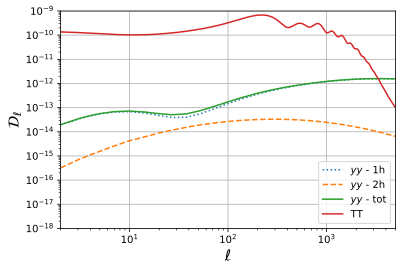

In [15]:
plt.loglog(ell_array, ell_array**2*cl1h/2/np.pi,':', label=r'$yy$ - 1h')
plt.loglog(ell_array, ell_array**2*cl2h/2/np.pi, '--', label=r'$yy$ - 2h')
plt.loglog(ell_array, ell_array**2*(cl1h+cl2h)/2/np.pi, '-', label=r'$yy$ - tot')
plt.loglog(ep.cosmo.cmb_spectra(5000,dl=True)[:,0]/(2.725e6)**2, label='TT')
plt.xlim([2,5000])
plt.ylim([1e-18,1e-9])
plt.grid()
plt.legend(loc='best')
plt.xlabel(r'$\ell$',size=15)
plt.ylabel(r'$\mathcal{D}_{\ell}$',size=15)
# plt.savefig('/Users/fbianchini/Research/WISExSCOS/figs/compton_y_auto.pdf', )

In [84]:
hm2 = HaloModel(cosmo, mf, lrange=ell_array, npts=50)

In [85]:
cl1h2 = hm2.GetCl1Halo(ep.y_ell)
cl2h2 = hm2.GetCl2Halo(ep.y_ell)

2.0
3.0
4.0
5.0
7.0
10.0
14.0
20.0
27.0
38.0
52.0
72.0
100.0
139.0
192.0
266.0
368.0
510.0
707.0
980.0
1357.0
1880.0
2605.0
3609.0
5000.0


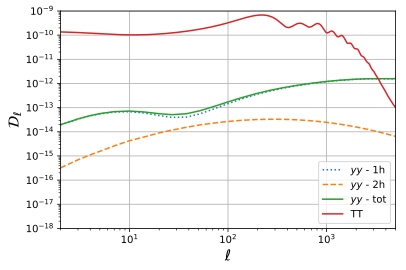

In [86]:
plt.loglog(ell_array, ell_array**2*cl1h2/2/np.pi,':', label=r'$yy$ - 1h')
plt.loglog(ell_array, ell_array**2*cl2h2/2/np.pi, '--', label=r'$yy$ - 2h')
plt.loglog(ell_array, ell_array**2*(cl1h2+cl2h2)/2/np.pi, '-', label=r'$yy$ - tot')
plt.loglog(ep.cosmo.cmb_spectra(5000,dl=True)[:,0]/(2.725e6)**2, label='TT')
plt.xlim([2,5000])
plt.ylim([1e-18,1e-9])
plt.grid()
plt.legend(loc='best')
plt.xlabel(r'$\ell$',size=15)
plt.ylabel(r'$\mathcal{D}_{\ell}$',size=15)
plt.savefig('/Users/fbianchini/Research/WISExSCOS/figs/compton_y_auto4.pdf', )

In [91]:
u.Mpc.to(u.m)

3.0856775814671917e+22

In [93]:
(const.c**2 / (4.*np.pi*const.G)).value

1.071618330357176e+26